Emergency 911 Calls Project - United States, Montgomery County Data Set  

For this project I will be analysing some US 911 call data from. [Kaggle](https://www.kaggle.com/mchirico/montcoalert)
This file contains data of emergency calls made in Montgomery County, Pennsylvania. This is a simple flat, CSV file.



**Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

**Import visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Read in the csv file as a dataframe called df **

In [3]:
df = pd.read_csv('911.csv')

**Check the info() of the df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Check the head of df **

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

**What are the top 5 zipcodes for 911 calls? **

In [6]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**What are the top 5 towns (twp) for 911 calls? **

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**Take a look at the 'title' column, how many unique title codes are there? **

In [8]:
df['title'].nunique()

110

## Creating new features

In the title column there are Reasons/Departments specified in the title EMS, Fire and Traffic. In order to further break down this data for analysis I will create a new column called Reasons. It will only contain the specific Reason for that call out. In order to do this I will create a lambda expression using.apply().

In [9]:
#for i in df['title']:
#    split = i.split(':')
#    print(split[0])
df['Reasons'] = df['title'].apply(lambda title: title.split(':')[0])
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire


**I can now query the dataframe for questions such as what is the most common Reason for a 911 call based off of this new column? **

In [10]:
df['Reasons'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reasons, dtype: int64

**I can now create a count plot to show this information as a visualisation through seaborn. **

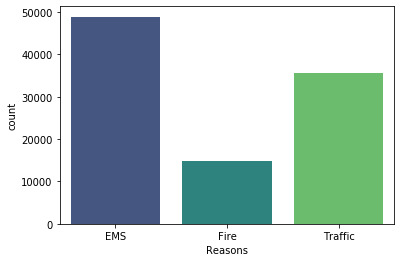

In [11]:
sns.countplot(x='Reasons',data=df,palette = 'viridis')

**Changing the TimeStamp from a string to a timestamp data type  **

In [12]:
df['timeStamp'].apply(type).value_counts()   


<class 'str'>    99492
Name: timeStamp, dtype: int64

In [13]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [14]:
type(df['timeStamp'].iloc[0]) #you can see it has now been changed to timestamp datatype

pandas._libs.tslibs.timestamps.Timestamp

**Now that the timestamp column is actually DateTime objects, I will use .apply() to create 3 new columns called Hour, Month, and Day of Week. I will create these columns based off of the timeStamp column.**

In [15]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

**Notice how the Day of Week is an integer 0-6. I will use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [16]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


**I will now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reasons column. **

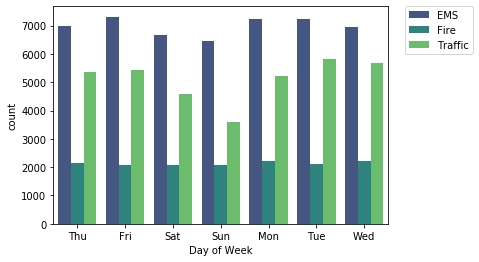

In [17]:
sns.countplot(x='Day of Week', data=df,hue='Reasons',palette = 'viridis')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**I will do the same for Month:**

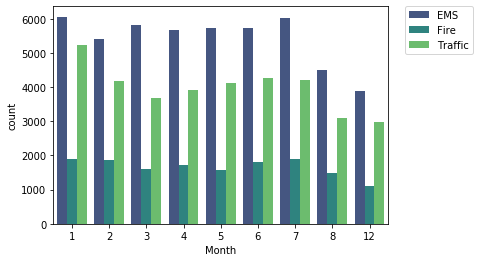

In [18]:
sns.countplot(x = 'Month',data=df,hue='Reasons',palette = 'viridis')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Months Sept,Oct,Nov missing?**

_____

** From the above count plot I noticed it was missing some Months, I can "fill in" this information by plotting the information in another way, A simple line plot that goes from Aug to Dec still allowing the use of a yearly projection.

In [19]:
byMonth = df.groupby('Month').count().head(12)
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


**I now create a simple plot off of the dataframe indicating the count of calls per month. **

Note - This does not create or find the missing data it just allows you to plot as well as you can with the data you have.

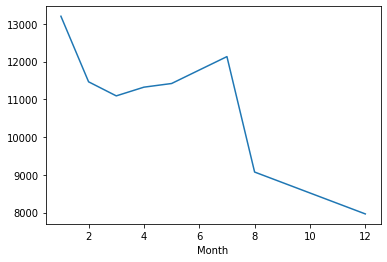

In [20]:
byMonth['twp'].plot()
#could be any column

**Create a new column called 'Date' that contains the date from the timeStamp column. **

In [21]:
df['Date'] = df['timeStamp'].apply(lambda time: time.date())

**Create a plot of 911 calls based on their times.**

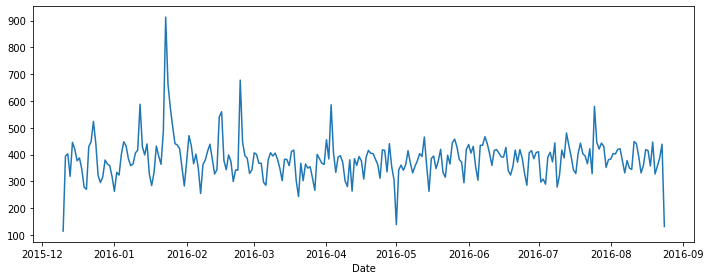

In [41]:
df.groupby('Date').count()['twp'].plot(figsize=(10,4))
plt.tight_layout()

**Here are 3 separate plots with each plot representing a Reason for the 911 call**

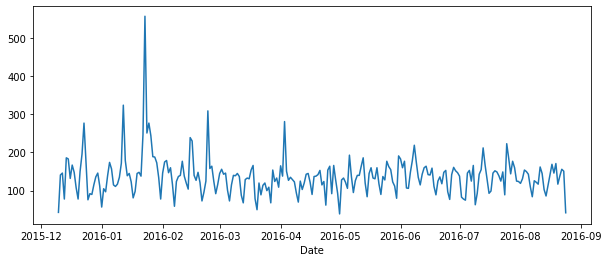

In [42]:
df[df['Reasons']=='Traffic'].groupby('Date').count()['twp'].plot(figsize=(10,4))


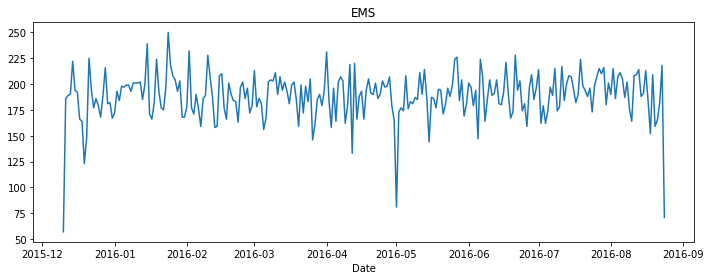

In [43]:
df[df['Reasons']=='EMS'].groupby('Date').count()['twp'].plot(figsize=(10,4))
plt.title('EMS')
plt.tight_layout()

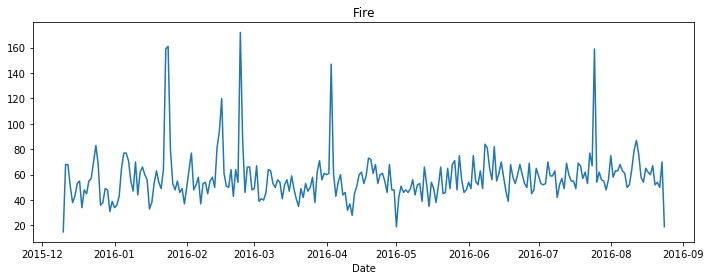

In [44]:
df[df['Reasons']=='Fire'].groupby('Date').count()['twp'].plot(figsize=(10,4))
plt.title('Fire')
plt.tight_layout()

**I have created a heatmap with seaborn.I need need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.

In [26]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reasons'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


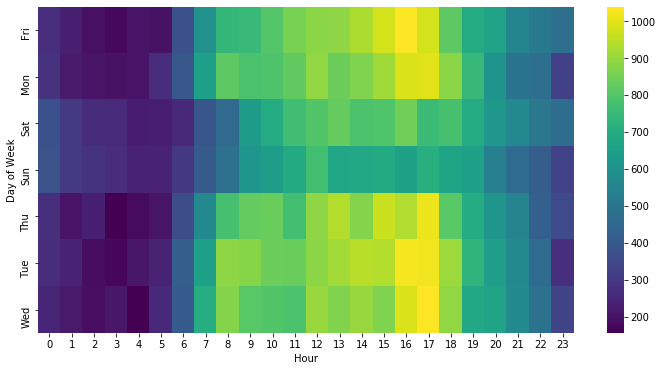

In [27]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

**Create a clustermap using this DataFrame. **

<Figure size 864x432 with 0 Axes>

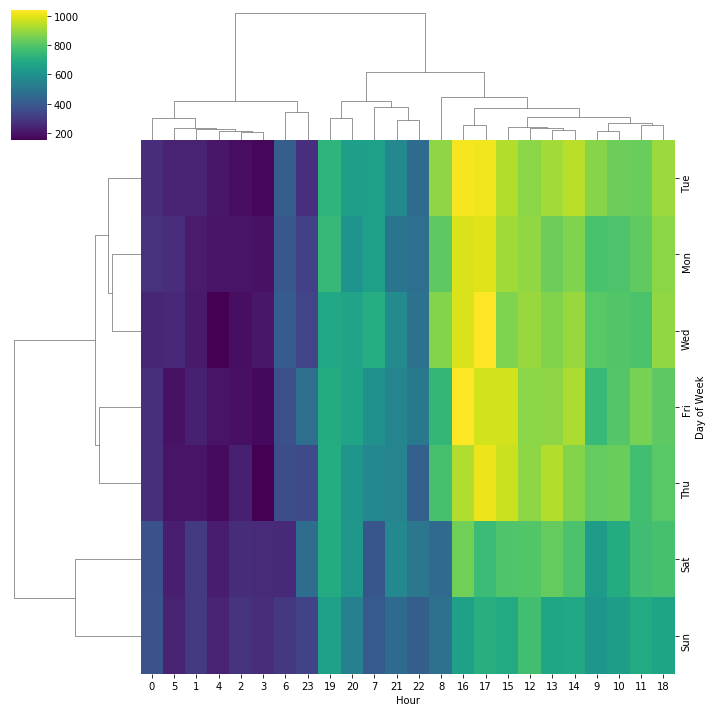

In [28]:
plt.figure(figsize=(12,6))
sns.clustermap(dayHour,cmap='viridis')

**Repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [29]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reasons'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


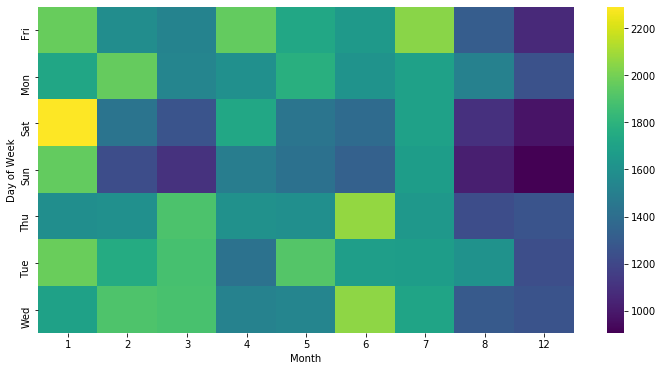

In [30]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

<Figure size 864x432 with 0 Axes>

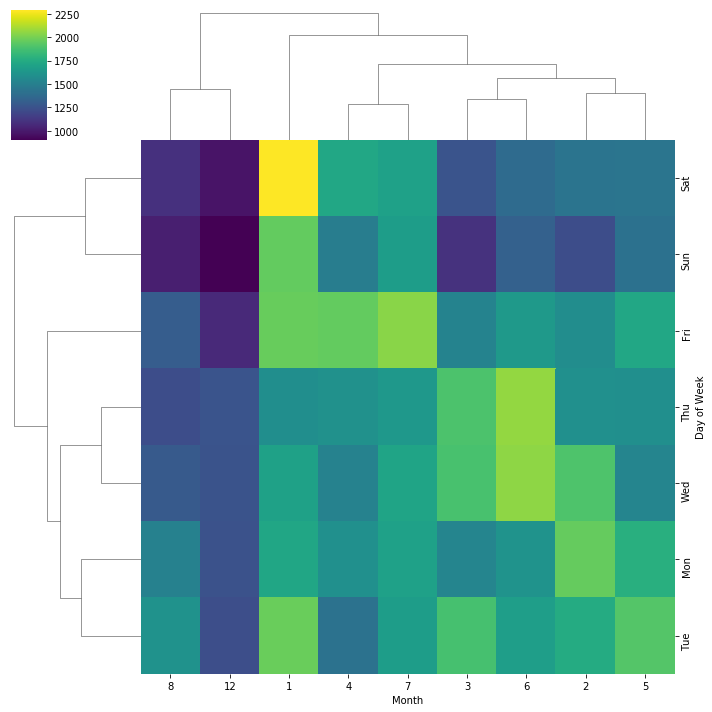

In [31]:
plt.figure(figsize=(12,6))
sns.clustermap(dayMonth,cmap='viridis')